In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV,cross_val_predict
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from autoviz.AutoViz_Class import AutoViz_Class
from pandas_profiling import ProfileReport
plt.style.use('seaborn-white')

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


In [2]:
def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(10,10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
#     plt.savefig(filename)

In [3]:
DATASET = os.path.join('data','Telecomms-Churn.csv')


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Shape of your Data Set: (7043, 21)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  11
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  5
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    20 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables

################ Binary_Classification VISUALIZATION Started #####################


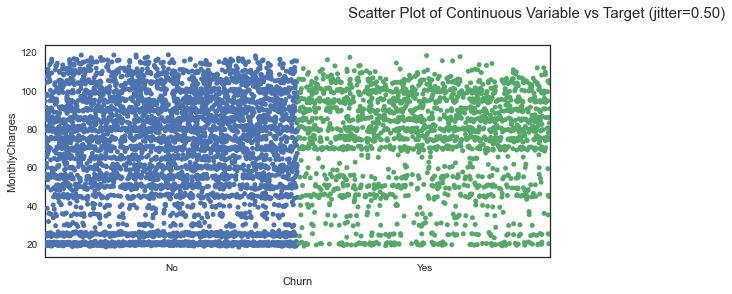

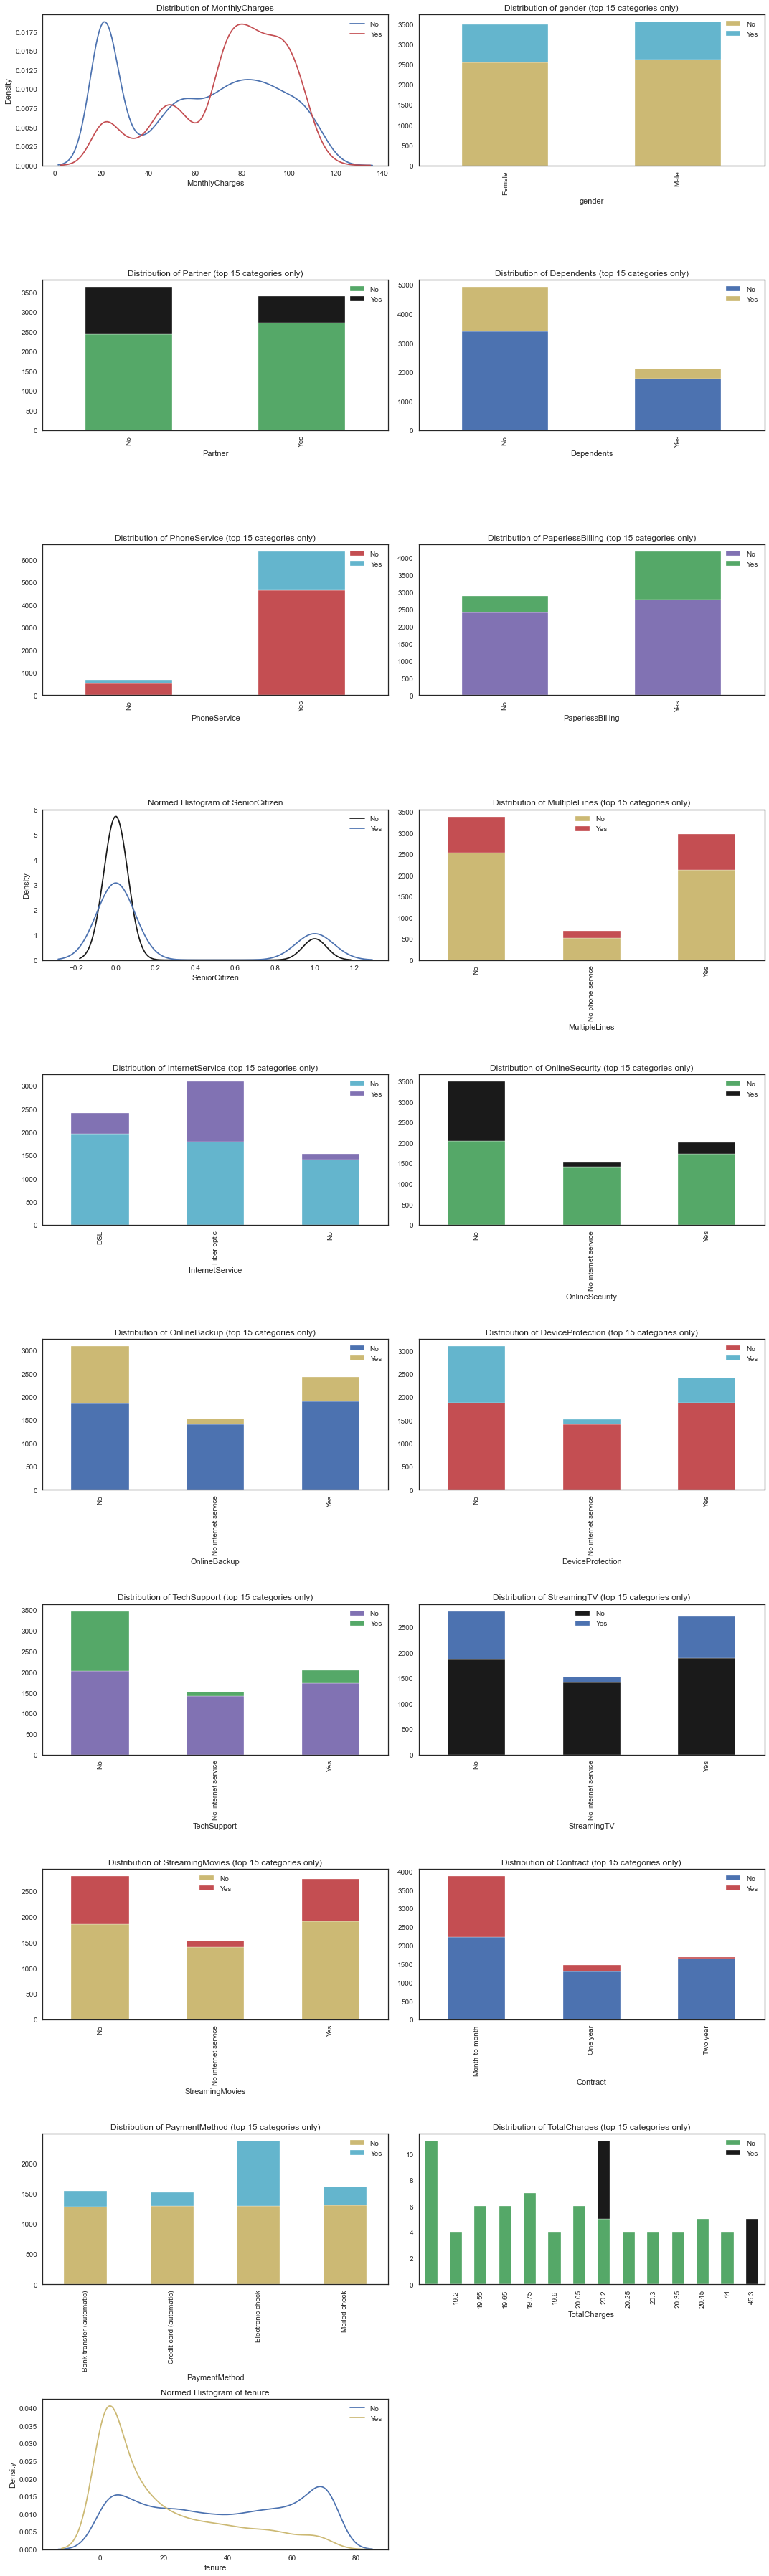

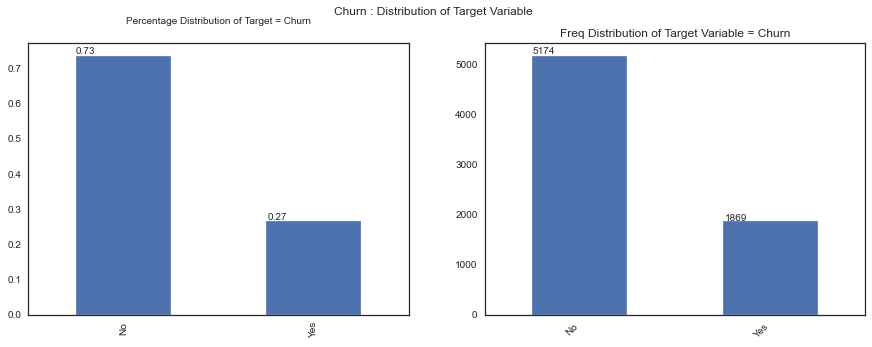

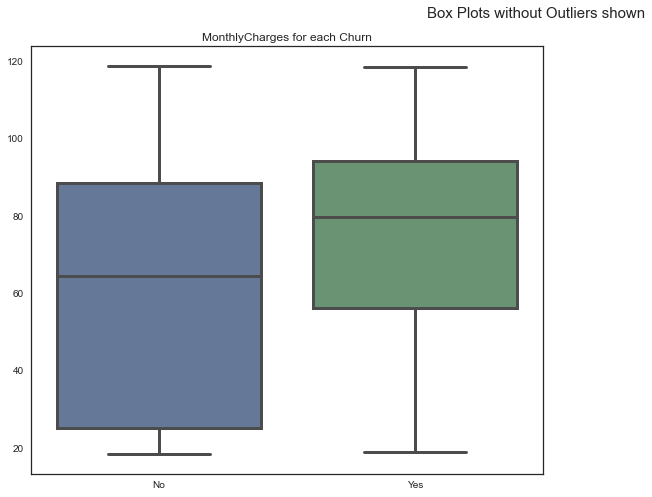

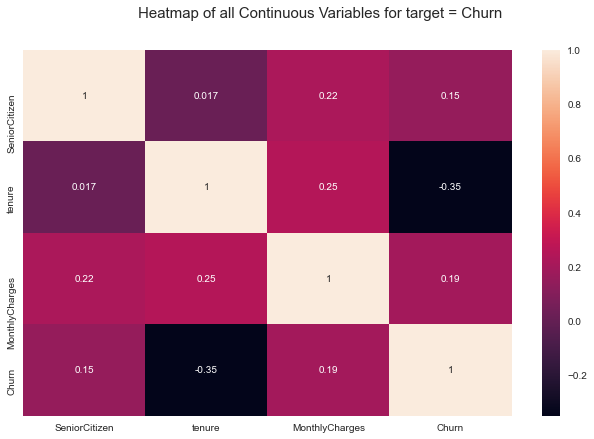

In [ ]:
df = pd.read_csv(DATASET)
df.head()


In [4]:
filename = DATASET
sep = ","
AV = AutoViz_Class()
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="Churn",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
profile = ProfileReport(df,explorative=True)
profile.to_file('churn-eda.html')

In [ ]:
profile.to_notebook_iframe()

In [ ]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float64')
df.dtypes

In [ ]:
df['Churn'].replace(to_replace = {'Yes': 1, 'No': 0},inplace=True)

In [ ]:
df.drop(['customerID'],axis=1,inplace=True)

In [ ]:
#Binary categorical variables that are text
binary_vars = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
binary_vars

In [ ]:
#Non Binary categorical variables that are text
# categ_vars = [col for col in (df.nunique()[(df.nunique() > 2) & (df.dtypes == np.object)] ).index]
categ_vars = ['gender','MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']


In [ ]:
#Numeric variables

numeric_vars = ['tenure','MonthlyCharges','TotalCharges']

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,FunctionTransformer,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator,TransformerMixin

In [ ]:
class CustomBinaryTransformer(BaseEstimator,TransformerMixin):
    
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        
        return X.replace(to_replace = {'Yes': 1, 'No': 0} )
        

In [ ]:
preprocessor = ColumnTransformer([
    ("num",StandardScaler(),numeric_vars),
    ("cat_vars",OneHotEncoder(),categ_vars),
    ("bin_vars",CustomBinaryTransformer(),binary_vars)
    
])

In [ ]:
X = df.drop('Churn',axis=1)
y = df.iloc[:,-1:]


In [ ]:
random_state = 42
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state)

In [ ]:
X_train_proc = preprocessor.fit_transform(X_train)

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix,plot_confusion_matrix,accuracy_score

In [ ]:
labels = np.array([0, 1])

In [ ]:
###RANDOM FOREST###
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train_proc,y_train)
y_train_forest_scores = cross_val_score(forest_clf,X_train_proc,y_train,cv=5,scoring="accuracy")
y_train_forest_pred = cross_val_predict(forest_clf,X_train_proc,y_train,cv=5,method='predict')
print(f'Mean Scores:{np.array(y_train_forest_scores).mean()}')
print(f'F1 Score: {f1_score(y_train, y_train_forest_pred)}')
print(classification_report(y_train, y_train_forest_pred))
features = X.columns
importances = forest_clf.feature_importances_
sorted(zip(importances,features))

In [ ]:
cm_analysis(y_train,y_train_forest_pred,labels)

In [ ]:
###NAIVE BAYES###
from sklearn.naive_bayes import GaussianNB
nv_bs = GaussianNB()
y_train_nv_scores=cross_val_score(nv_bs,X_train_proc,y_train,cv=5,scoring="accuracy")
y_train_nv_pred = cross_val_predict(nv_bs,X_train_proc,y_train,cv=5,method='predict')
print(f'Mean Scores:{np.array(y_train_nv_scores).mean()}')
print(f'F1 Score: {f1_score(y_train, y_train_nv_pred)}')
print(confusion_matrix(y_train,y_train_nv_pred))
print(classification_report(y_train, y_train_nv_pred))

In [ ]:
#K Neighbors
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=10)
y_train_kn_scores=cross_val_score(kn,X_train_proc,y_train,cv=5,scoring="accuracy")
y_train_kn_pred = cross_val_predict(kn,X_train_proc,y_train,cv=5,method='predict')
print(f'Mean Scores:{np.array(y_train_kn_scores).mean()}')
print(f'F1 Score: {f1_score(y_train, y_train_kn_pred)}')
print(confusion_matrix(y_train,y_train_kn_pred))
print(classification_report(y_train, y_train_kn_pred))

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression(C=0.1)
y_train_logR_scores=cross_val_score(logR,X_train_proc,y_train,cv=5,scoring="accuracy")
y_train_logR_pred = cross_val_predict(logR,X_train_proc,y_train,cv=5,method='predict')
print(f'Mean Scores:{np.array(y_train_logR_scores).mean()}')
print(f'F1 Score: {f1_score(y_train, y_train_logR_pred)}')
print(confusion_matrix(y_train,y_train_logR_pred))
print(classification_report(y_train, y_train_logR_pred))

In [46]:
###VOTING CLASSIFIER###
clf1 = XGBClassifier()
clf2 = RandomForestClassifier(n_estimators=50)
clf3 = GaussianNB()
clf4 =  LogisticRegression(C=0.1)

eclf = VotingClassifier(
    estimators=[('xgb', clf1), ('rf', clf2), ('gnb', clf3),('logR',clf4)],
    voting='hard')


for clf, label in zip([clf1, clf2, clf3,clf4, eclf], ['XGBoost', 'Random Forest', 'naive Bayes','logistic Reg' ,'Ensemble']):
    scores = cross_val_score(clf, X_train_proc, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


In [ ]:
grid={"C":np.logspace(-10,-3,3,10), "penalty":["l1","l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train_proc,y_train)

print("Best Params ",logreg_cv.best_params_)
print("Best Accuracy :",logreg_cv.best_score_)

In [ ]:
y_best_log_pred = cross_val_predict(logreg_cv.best_estimator_, X_train_proc, y_train)

print(f'F1 Score: {f1_score(y_train, y_best_log_pred)}')
print(confusion_matrix(y_train,y_best_log_pred))
print(classification_report(y_train, y_best_log_pred))

In [ ]:
classifiers = [forest_clf,nv_bs,kn,logR,eclf]
X_test_proc = preprocessor.fit_transform(X_test)
for classifier in classifiers:
    name = classifier.__class__.__name__
    
    y_pred = classifier.predict(X_test_proc)
    acc = accuracy_score(y_test,y_pred)
    print("-"*30)
    print(name + ":")
    print("Accuracy: {:.4%}".format(acc))
    

In [ ]:
logR.fit(X_train_proc,y_train)
X_test_proc = preprocessor.fit_transform(X_test)
logR_test_pred = logR.predict(X_test_proc)
acc = accuracy_score(y_test,logR_test_pred)
print("-"*30)
print("Log Reg:")
print("Accuracy: {:.4%}".format(acc))
print(confusion_matrix(y_test,logR_test_pred))
print(classification_report(y_test, logR_test_pred))

In [ ]:
cm_analysis(y_test,logR_test_pred,np.array([0, 1]))
